# Document Layout Analysis Using SSD

## About the network:
1. Paper on SSD: https://arxiv.org/abs/1512.02325

2. Blog-1 on SSD: https://towardsdatascience.com/review-ssd-single-shot-detector-object-detection-851a94607d11

3. Blog-2 on SSD: https://medium.com/@jonathan_hui/ssd-object-detection-single-shot-multibox-detector-for-real-time-processing-9bd8deac0e06

# Table of Contents

### 1. Installation Instructions
### 2. Use trained Model for Document Layout Analysis
### 3. How to train using PRImA Layout Analysis Dataset

# Installation

- Run these commands

    - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

    - cd Monk_Object_Detection/1_gluoncv_finetune/installation

- Select the right requirements file and run

    - cat requirements_cuda10.1.txt | xargs -n 1 -L 1 pip install

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
# For colab use the command below
#! cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_colab.txt | xargs -n 1 -L 1 pip install


# For Local systems and cloud select the right CUDA version
!cd Monk_Object_Detection/1_gluoncv_finetune/installation && cat requirements_cuda10.1.txt | xargs -n 1 -L 1 pip install

# Use Already Trained Model for Demo

In [2]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [3]:
from inference_prototype import Infer

In [ ]:
#Download trained model

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1E6T7RKGwy-v1MUxVJm-rxt5XcRyr2SQ7' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1E6T7RKGwy-v1MUxVJm-rxt5XcRyr2SQ7" -O obj_dla_ssd512_trained.zip && rm -rf /tmp/cookies.txt

In [5]:
! unzip -qq obj_dla_ssd512_trained.zip

In [8]:
model_name = "ssd_512_vgg16_atrous_coco";
params_file = "dla_ssd512/dla_ssd512-vgg16.params";
class_list = ["paragraph", "heading", "credit", "footer", "drop-capital", "floating", "noise", "maths", "header", "caption", "image", "linedrawing", "graphics", "fname", "page-number", "chart", "separator", "table"];

In [9]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

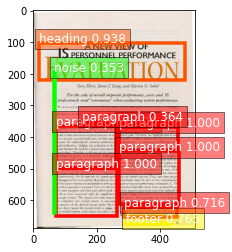

<Figure size 432x288 with 0 Axes>

In [11]:
img_name = "Test_Images/test1.jpg"; 
visualize = True;
thresh = 0.3;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

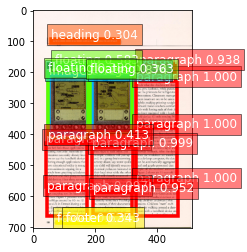

<Figure size 432x288 with 0 Axes>

In [13]:
img_name = "Test_Images/test2.jpg"; 
visualize = True;
thresh = 0.3;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

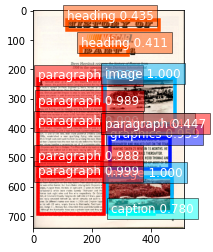

<Figure size 432x288 with 0 Axes>

In [14]:
img_name = "Test_Images/test3.jpg"; 
visualize = True;
thresh = 0.4;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

# Train Your Own Model

## Dataset Credits
- https://www.primaresearch.org/datasets/Layout_Analysis

In [ ]:
#Download Dataset

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1iBfafT1WHAtKAW0a1ifLzvW5f0ytm2i_" -O PRImA_Layout_Analysis_Dataset.zip && rm -rf /tmp/cookies.txt

In [2]:
! unzip -qq PRImA_Layout_Analysis_Dataset.zip

# Data Preprocessing

### Library for Data Augmentation
Refer to https://github.com/albumentations-team/albumentations for more details

In [ ]:
! pip install albumentations

In [3]:
import os
import sys
import cv2
import numpy as np
import pandas as pd
from PIL import Image
import albumentations as A
import glob
import matplotlib.pyplot as plt
import xmltodict
import json
from tqdm.notebook import tqdm
from pycocotools.coco import COCO

In [15]:
root_dir = "PRImA Layout Analysis Dataset/";
img_dir = "Images/";
anno_dir = "XML/";
final_root_dir="Document_Layout_Analysis/" #Directory for jpeg and augmented images

In [10]:
if not os.path.exists(final_root_dir):
    os.makedirs(final_root_dir)

if not os.path.exists(final_root_dir+img_dir):
    os.makedirs(final_root_dir+img_dir)

## TIFF Image Format to JPEG Image Format

In [16]:
for name in glob.glob(root_dir+img_dir+'*.tif'):
    im = Image.open(name)
    name = str(name).rstrip(".tif")
    name = str(name).lstrip(root_dir)
    name = str(name).lstrip(img_dir)
    im.save(final_root_dir+ img_dir+ name + '.jpg', 'JPEG')

# Format Conversion and Data Augmentation

As most part of a document is text, there were far more paragraphs in the dataset than there were other labels such as tables or graphs. To handle this huge bias in the dataset, we augmented only those document images which had one of these minority labels in them. For example, if the document only had paragraphs and images, then we didn’t augment it. But if it had tables, charts, graphs or any other minority label, we augmented that image by many folds. This process helped in reducing the bias in the dataset by around 25%. This selection and augmentation has been done during the format conversion from VOC to Monk Format.

## Given format- VOC Format

### Dataset Directory Structure

    ./PRImA Layout Analysis Dataset/ (root_dir)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------Annotations (anno_dir)
          |              |
          |              |------------------img1.xml
          |              |------------------img2.xml
          |              |------------------.........(and so on)
          


## Required Format- Monk Format

### Dataset Directory Structure

    ./Document_Layout_Analysis/ (final_root_dir)
          |
          |-----------Images (img_dir)
          |              |
          |              |------------------img1.jpg
          |              |------------------img2.jpg
          |              |------------------.........(and so on)
          |
          |
          |-----------train_labels.csv (anno_file)
          
          
### Annotation file format

           | Id         | Labels                                 |
           | img1.jpg   | x1 y1 x2 y2 label1 x1 y1 x2 y2 label2  |
           
- Labels:  xmin ymin xmax ymax label
- xmin, ymin - top left corner of bounding box
- xmax, ymax - bottom right corner of bounding box

In [18]:
files = os.listdir(root_dir + anno_dir);

In [19]:
combined = [];

### Data Augmentation Function

In [20]:
def augmentData(fname, boxes):
    image = cv2.imread(final_root_dir+img_dir+fname)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
 
    transform = A.Compose([
        A.IAAPerspective(p=0.7),   
        A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=5, p=0.5),
        A.IAAAdditiveGaussianNoise(),
        A.ChannelShuffle(),
        A.RandomBrightnessContrast(),
        A.RGBShift(p=0.8),
        A.HueSaturationValue(p=0.8)
        ], bbox_params=A.BboxParams(format='pascal_voc', min_visibility=0.2))
    
    for i in range(1, 9):
        label=""
        transformed = transform(image=image, bboxes=boxes)
        transformed_image = transformed['image']
        transformed_bboxes = transformed['bboxes']
        #print(transformed_bboxes)
        flag=False
        for box in transformed_bboxes:
            x_min, y_min, x_max, y_max, class_name = box
            if(xmax<=xmin or ymax<=ymin):
                flag=True
                break
            label+= str(int(x_min))+' '+str(int(y_min))+' '+str(int(x_max))+' '+str(int(y_max))+' '+class_name+' '
                        
        if(flag):
            continue
        cv2.imwrite(final_root_dir+img_dir+str(i)+fname, transformed_image)
        label=label[:-1]
        combined.append([str(i) + fname, label])


# VOC to Monk Format Conversion
Applying Data Augmentation only on those images which contain atleast 1 minority class so as to reduce bias in the dataset

In [21]:
#label generation for csv
for i in tqdm(range(len(files))):
    box=[];
    augment=False;
    annoFile = root_dir + anno_dir + files[i];
    f = open(annoFile, 'r');
    my_xml = f.read();
    anno= dict(dict(dict(xmltodict.parse(my_xml))['PcGts'])['Page'])
    fname=""
    for j in range(len(files[i])):
        if((files[i][j])>='0' and files[i][j]<='9'):
            fname+=files[i][j];
    fname+=".jpg"
    image = cv2.imread(final_root_dir+img_dir+fname)
    height, width = image.shape[:2]    
    label_str = ""
    for key in anno.keys():
        if(key=='@imageFilename' or key=='@imageWidth' or key=='@imageHeight'):
            continue
        if(key=="TextRegion"):
            if(type(anno["TextRegion"]) == list):
                for j in range(len(anno["TextRegion"])):
                    text=anno["TextRegion"][j]
                    xmin=width
                    ymin=height
                    xmax=0
                    ymax=0
                    if(text["Coords"]):
                        if(text["Coords"]["Point"]):
                            for k in range(len(text["Coords"]["Point"])):
                                coordinates=anno["TextRegion"][j]["Coords"]["Point"][k]
                                xmin= min(xmin, int(coordinates['@x']));
                                ymin= min(ymin, int(coordinates['@y']));
                                xmax= min(max(xmax, int(coordinates['@x'])), width);
                                ymax= min(max(ymax, int(coordinates['@y'])), height);
                            if('@type' in text.keys()):    
                                label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+text['@type']+' '
                                if(xmax<=xmin or ymax<=ymin):
                                    continue
                                tbox=[];
                                tbox.append(xmin)
                                tbox.append(ymin)
                                tbox.append(xmax)
                                tbox.append(ymax)
                                tbox.append(text['@type'])
                                box.append(tbox)
            else:
                text=anno["TextRegion"]
                xmin=width
                ymin=height
                xmax=0
                ymax=0
                if(text["Coords"]):
                    if(text["Coords"]["Point"]):
                        for k in range(len(text["Coords"]["Point"])):
                            coordinates=anno["TextRegion"]["Coords"]["Point"][k]
                            xmin= min(xmin, int(coordinates['@x']));
                            ymin= min(ymin, int(coordinates['@y']));
                            xmax= min(max(xmax, int(coordinates['@x'])), width);
                            ymax= min(max(ymax, int(coordinates['@y'])), height);
                        if('@type' in text.keys()):    
                            label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+text['@type']+' '
                            if(xmax<=xmin or ymax<=ymin):
                                continue
                            tbox=[];
                            tbox.append(xmin)
                            tbox.append(ymin)
                            tbox.append(xmax)
                            tbox.append(ymax)
                            tbox.append(text['@type'])
                            box.append(tbox)
        
        else:
            val=""
            if(key=='GraphicRegion'):
                val="graphics"
                augment=True
            elif(key=='ImageRegion'):
                val="image"
            elif(key=='NoiseRegion'):
                val="noise"
                augment=True
            elif(key=='ChartRegion'):
                val="chart"
                augment=True
            elif(key=='TableRegion'):
                val="table"
                augment=True
            elif(key=='SeparatorRegion'):
                val="separator"
            elif(key=='MathsRegion'):
                val="maths"
                augment=True
            elif(key=='LineDrawingRegion'):
                val="linedrawing"
                augment=True
            else:
                val="frame"
                augment=True

            
            if(type(anno[key]) == list):
                for j in range(len(anno[key])):
                    text=anno[key][j]
                    xmin=width
                    ymin=height
                    xmax=0
                    ymax=0
                    if(text["Coords"]):
                        if(text["Coords"]["Point"]):
                            for k in range(len(text["Coords"]["Point"])):
                                coordinates=anno[key][j]["Coords"]["Point"][k]
                                xmin= min(xmin, int(coordinates['@x']));
                                ymin= min(ymin, int(coordinates['@y']));
                                xmax= min(max(xmax, int(coordinates['@x'])), width);
                                ymax= min(max(ymax, int(coordinates['@y'])), height);
                        label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+ val +' '
                        if(xmax<=xmin or ymax<=ymin):
                            continue
                        tbox=[];
                        tbox.append(xmin)
                        tbox.append(ymin)
                        tbox.append(xmax)
                        tbox.append(ymax)
                        tbox.append(val)
                        box.append(tbox)
            else:
                text=anno[key]
                xmin=width
                ymin=height
                xmax=0
                ymax=0
                if(text["Coords"]):
                    if(text["Coords"]["Point"]):
                        for k in range(len(text["Coords"]["Point"])):
                            coordinates=anno[key]["Coords"]["Point"][k]
                            xmin= min(xmin, int(coordinates['@x']));
                            ymin= min(ymin, int(coordinates['@y']));
                            xmax= min(max(xmax, int(coordinates['@x'])), width);
                            ymax= min(max(ymax, int(coordinates['@y'])), height);  
                        label_str+= str(xmin)+' '+str(ymin)+' '+str(xmax)+' '+str(ymax)+' '+val+' '
                        if(xmax<=xmin or ymax<=ymin):
                            continue
                        tbox=[];
                        tbox.append(xmin)
                        tbox.append(ymin)
                        tbox.append(xmax)
                        tbox.append(ymax)
                        tbox.append(val)
                        box.append(tbox)

    label_str=label_str[:-1]
    combined.append([fname, label_str])

    if(augment):
        augmentData(fname, box)
        

In [22]:
df = pd.DataFrame(combined, columns = ['ID', 'Label']);
df.to_csv(final_root_dir + "/train_labels.csv", index=False);

# Training

In [1]:
import os
import sys

sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [2]:
from detector_prototype import Detector

In [3]:
gtf = Detector();

In [4]:
root = "Document_Layout_Analysis/";
img_dir = "Images/";
anno_file = "train_labels.csv";
batch_size=8;

In [5]:
gtf.Dataset(root, img_dir, anno_file, batch_size=batch_size);

### Available models
    ssd_300_vgg16_atrous_coco
    ssd_300_vgg16_atrous_voc
    ssd_512_vgg16_atrous_coco
    ssd_512_vgg16_atrous_voc
    ssd_512_resnet50_v1_coco
    ssd_512_resnet50_v1_voc
    ssd_512_mobilenet1.0_voc
    ssd_512_mobilenet1.0_coco
    yolo3_darknet53_voc
    yolo3_darknet53_coco
    yolo3_mobilenet1.0_voc
    yolo3_mobilenet1.0_coco

In [6]:
#vgg16 architecture, with atrous convolutions, pretrained on COCO dataset is used for this task
pretrained = True;         
gpu=True;
model_name = "ssd_512_vgg16_atrous_coco";

In [7]:
gtf.Model(model_name, use_pretrained=pretrained, use_gpu=gpu);

In [10]:
gtf.Set_Learning_Rate(0.003);

In [11]:
epochs=30;
params_file = "saved_model.params";

In [12]:
gtf.Train(epochs, params_file);

[Epoch 0][Batch 0], Speed: 0.340 samples/sec, CrossEntropy=20.430, SmoothL1=7.349
[Epoch 0][Batch 20], Speed: 1.176 samples/sec, CrossEntropy=12.521, SmoothL1=5.808
[Epoch 0][Batch 40], Speed: 2.159 samples/sec, CrossEntropy=11.224, SmoothL1=5.160
[Epoch 0][Batch 60], Speed: 1.375 samples/sec, CrossEntropy=10.177, SmoothL1=4.937
[Epoch 0][Batch 80], Speed: 1.622 samples/sec, CrossEntropy=9.225, SmoothL1=4.885
[Epoch 0][Batch 100], Speed: 1.218 samples/sec, CrossEntropy=8.411, SmoothL1=4.783
[Epoch 0][Batch 120], Speed: 1.050 samples/sec, CrossEntropy=7.783, SmoothL1=4.628
[Epoch 0][Batch 140], Speed: 0.665 samples/sec, CrossEntropy=7.278, SmoothL1=4.395
[Epoch 0][Batch 160], Speed: 1.531 samples/sec, CrossEntropy=6.879, SmoothL1=4.303
[Epoch 0][Batch 180], Speed: 0.746 samples/sec, CrossEntropy=6.547, SmoothL1=4.201
[Epoch 0][Batch 200], Speed: 1.070 samples/sec, CrossEntropy=6.282, SmoothL1=4.167
[Epoch 0][Batch 220], Speed: 1.162 samples/sec, CrossEntropy=6.051, SmoothL1=4.091
[Epoch

[Epoch 5][Batch 0], Speed: 1.202 samples/sec, CrossEntropy=2.481, SmoothL1=2.156
[Epoch 5][Batch 20], Speed: 0.927 samples/sec, CrossEntropy=2.647, SmoothL1=1.914
[Epoch 5][Batch 40], Speed: 0.906 samples/sec, CrossEntropy=2.616, SmoothL1=2.252
[Epoch 5][Batch 60], Speed: 1.720 samples/sec, CrossEntropy=2.614, SmoothL1=2.362
[Epoch 5][Batch 80], Speed: 1.335 samples/sec, CrossEntropy=2.600, SmoothL1=2.327
[Epoch 5][Batch 100], Speed: 1.180 samples/sec, CrossEntropy=2.616, SmoothL1=2.370
[Epoch 5][Batch 120], Speed: 1.605 samples/sec, CrossEntropy=2.625, SmoothL1=2.434
[Epoch 5][Batch 140], Speed: 1.163 samples/sec, CrossEntropy=2.622, SmoothL1=2.454
[Epoch 5][Batch 160], Speed: 1.367 samples/sec, CrossEntropy=2.601, SmoothL1=2.399
[Epoch 5][Batch 180], Speed: 1.381 samples/sec, CrossEntropy=2.597, SmoothL1=2.397
[Epoch 5][Batch 200], Speed: 1.444 samples/sec, CrossEntropy=2.610, SmoothL1=2.405
[Epoch 5][Batch 220], Speed: 1.093 samples/sec, CrossEntropy=2.611, SmoothL1=2.415
[Epoch 5][

[Epoch 10][Batch 0], Speed: 1.509 samples/sec, CrossEntropy=2.504, SmoothL1=1.689
[Epoch 10][Batch 20], Speed: 0.915 samples/sec, CrossEntropy=2.311, SmoothL1=2.273
[Epoch 10][Batch 40], Speed: 1.664 samples/sec, CrossEntropy=2.396, SmoothL1=2.386
[Epoch 10][Batch 60], Speed: 1.311 samples/sec, CrossEntropy=2.366, SmoothL1=2.328
[Epoch 10][Batch 80], Speed: 1.471 samples/sec, CrossEntropy=2.334, SmoothL1=2.248
[Epoch 10][Batch 100], Speed: 0.905 samples/sec, CrossEntropy=2.339, SmoothL1=2.263
[Epoch 10][Batch 120], Speed: 1.183 samples/sec, CrossEntropy=2.336, SmoothL1=2.191
[Epoch 10][Batch 140], Speed: 1.159 samples/sec, CrossEntropy=2.341, SmoothL1=2.244
[Epoch 10][Batch 160], Speed: 0.936 samples/sec, CrossEntropy=2.348, SmoothL1=2.229
[Epoch 10][Batch 180], Speed: 1.113 samples/sec, CrossEntropy=2.341, SmoothL1=2.201
[Epoch 10][Batch 200], Speed: 1.260 samples/sec, CrossEntropy=2.340, SmoothL1=2.212
[Epoch 10][Batch 220], Speed: 1.085 samples/sec, CrossEntropy=2.346, SmoothL1=2.19

[Epoch 14][Batch 360], Speed: 1.356 samples/sec, CrossEntropy=2.219, SmoothL1=2.089
[Epoch 14][Batch 380], Speed: 1.156 samples/sec, CrossEntropy=2.216, SmoothL1=2.078
[Epoch 15][Batch 0], Speed: 1.076 samples/sec, CrossEntropy=2.129, SmoothL1=2.103
[Epoch 15][Batch 20], Speed: 0.853 samples/sec, CrossEntropy=2.209, SmoothL1=2.051
[Epoch 15][Batch 40], Speed: 0.924 samples/sec, CrossEntropy=2.214, SmoothL1=1.899
[Epoch 15][Batch 60], Speed: 0.960 samples/sec, CrossEntropy=2.213, SmoothL1=1.955
[Epoch 15][Batch 80], Speed: 0.881 samples/sec, CrossEntropy=2.220, SmoothL1=1.962
[Epoch 15][Batch 100], Speed: 0.806 samples/sec, CrossEntropy=2.224, SmoothL1=1.999
[Epoch 15][Batch 120], Speed: 1.132 samples/sec, CrossEntropy=2.217, SmoothL1=2.009
[Epoch 15][Batch 140], Speed: 1.480 samples/sec, CrossEntropy=2.218, SmoothL1=2.045
[Epoch 15][Batch 160], Speed: 1.159 samples/sec, CrossEntropy=2.220, SmoothL1=2.054
[Epoch 15][Batch 180], Speed: 0.956 samples/sec, CrossEntropy=2.231, SmoothL1=2.03

[Epoch 19][Batch 320], Speed: 0.838 samples/sec, CrossEntropy=2.119, SmoothL1=2.036
[Epoch 19][Batch 340], Speed: 0.443 samples/sec, CrossEntropy=2.121, SmoothL1=2.034
[Epoch 19][Batch 360], Speed: 0.955 samples/sec, CrossEntropy=2.119, SmoothL1=2.038
[Epoch 19][Batch 380], Speed: 1.150 samples/sec, CrossEntropy=2.115, SmoothL1=2.037
[Epoch 20][Batch 0], Speed: 1.793 samples/sec, CrossEntropy=2.057, SmoothL1=2.209
[Epoch 20][Batch 20], Speed: 0.968 samples/sec, CrossEntropy=1.975, SmoothL1=2.014
[Epoch 20][Batch 40], Speed: 0.768 samples/sec, CrossEntropy=1.998, SmoothL1=2.182
[Epoch 20][Batch 60], Speed: 0.811 samples/sec, CrossEntropy=2.073, SmoothL1=2.127
[Epoch 20][Batch 80], Speed: 0.680 samples/sec, CrossEntropy=2.065, SmoothL1=2.045
[Epoch 20][Batch 100], Speed: 1.548 samples/sec, CrossEntropy=2.102, SmoothL1=2.175
[Epoch 20][Batch 120], Speed: 1.267 samples/sec, CrossEntropy=2.094, SmoothL1=2.152
[Epoch 20][Batch 140], Speed: 1.009 samples/sec, CrossEntropy=2.104, SmoothL1=2.12

[Epoch 24][Batch 280], Speed: 0.618 samples/sec, CrossEntropy=2.058, SmoothL1=1.957
[Epoch 24][Batch 300], Speed: 2.330 samples/sec, CrossEntropy=2.059, SmoothL1=1.962
[Epoch 24][Batch 320], Speed: 1.069 samples/sec, CrossEntropy=2.058, SmoothL1=1.962
[Epoch 24][Batch 340], Speed: 0.966 samples/sec, CrossEntropy=2.057, SmoothL1=1.958
[Epoch 24][Batch 360], Speed: 0.930 samples/sec, CrossEntropy=2.053, SmoothL1=1.951
[Epoch 24][Batch 380], Speed: 1.012 samples/sec, CrossEntropy=2.050, SmoothL1=1.959
[Epoch 25][Batch 0], Speed: 0.871 samples/sec, CrossEntropy=2.141, SmoothL1=1.410
[Epoch 25][Batch 20], Speed: 0.884 samples/sec, CrossEntropy=2.031, SmoothL1=2.035
[Epoch 25][Batch 40], Speed: 0.566 samples/sec, CrossEntropy=2.049, SmoothL1=2.037
[Epoch 25][Batch 60], Speed: 1.477 samples/sec, CrossEntropy=2.049, SmoothL1=2.028
[Epoch 25][Batch 80], Speed: 1.322 samples/sec, CrossEntropy=2.057, SmoothL1=1.999
[Epoch 25][Batch 100], Speed: 1.056 samples/sec, CrossEntropy=2.063, SmoothL1=1.94

[Epoch 29][Batch 240], Speed: 0.933 samples/sec, CrossEntropy=1.990, SmoothL1=1.857
[Epoch 29][Batch 260], Speed: 0.931 samples/sec, CrossEntropy=1.985, SmoothL1=1.840
[Epoch 29][Batch 280], Speed: 0.965 samples/sec, CrossEntropy=1.990, SmoothL1=1.843
[Epoch 29][Batch 300], Speed: 1.518 samples/sec, CrossEntropy=1.989, SmoothL1=1.858
[Epoch 29][Batch 320], Speed: 1.252 samples/sec, CrossEntropy=1.991, SmoothL1=1.893
[Epoch 29][Batch 340], Speed: 0.961 samples/sec, CrossEntropy=1.996, SmoothL1=1.916
[Epoch 29][Batch 360], Speed: 3.016 samples/sec, CrossEntropy=1.997, SmoothL1=1.923
[Epoch 29][Batch 380], Speed: 1.066 samples/sec, CrossEntropy=1.996, SmoothL1=1.914


# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/1_gluoncv_finetune/lib/");

In [2]:
from inference_prototype import Infer

In [8]:
model_name = "ssd_512_vgg16_atrous_coco";
params_file = "saved_model.params";
class_list = ["paragraph", "heading", "credit", "footer", "drop-capital", "floating", "noise", "maths", "header", "caption", "image", "linedrawing", "graphics", "fname", "page-number", "chart", "separator", "table"];

In [9]:
gtf = Infer(model_name, params_file, class_list, use_gpu=True);

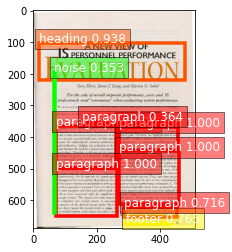

<Figure size 432x288 with 0 Axes>

In [11]:
img_name = "Test_Images/test1.jpg"; 
visualize = True;
thresh = 0.3;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

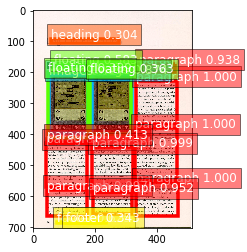

<Figure size 432x288 with 0 Axes>

In [63]:
img_name = "Test_Images/test2.jpg"; 
visualize = True;
thresh = 0.3;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

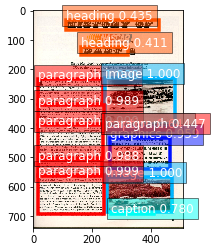

<Figure size 432x288 with 0 Axes>

In [66]:
img_name = "Test_Images/test3.jpg"; 
visualize = True;
thresh = 0.4;
output = gtf.run(img_name, visualize=visualize, thresh=thresh);

### Inference
SSD512 produces outputs with very high confidence, a lot of them being 0.9+. It was also the only model which was able to identify footer and noises like division lines in the document. But it was also producing repetitive or incorrect headings such as ‘floating’ in the 2nd example (extra box with incorrect label), and graphics and paragraph in the third (2 boxes with different labels for the same region).

If these small details like footer, separator, etc. are crucial for your work and the focus is more on bounding box prediction than classification, go for SSD512. It should also be considered that gluoncv-finetune pipeline of Monk AI (which has been used for SSD512) also provides architectures which are pre-trained on various other datasets, such as COCO dataset.